In [1]:
import os
import sys
import json
from copy import deepcopy
from tqdm.notebook import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
!ls data_files/store_model_scores/sorted

test_set_q_candidate_model_scores_0.json
test_set_q_candidate_model_scores_1.json
test_set_q_candidate_model_scores_2.json
test_set_q_candidate_model_scores_3.json


#### Load the sorted scores thing (assume zero-based numbeering)

In [4]:
INPUT_FILE_PATH="data_files/store_model_scores/sorted_pruned/"

In [5]:
file_idx=0

with open(INPUT_FILE_PATH+f"test_set_q_candidate_model_scores_{file_idx}.json",'r') as fd:
    df=json.load(fd)

df['440482']

In [6]:
def fetch_rank_of_duplicates(q_obj, model_idx):
    ranks=[]
    for curr_contender in q_obj['scores']:
        if curr_contender['candidate_qid'] not in q_obj['expected_questions']:
            continue
        ranks.append(curr_contender['rank'][model_idx])
    return ranks
        

In [7]:
def fetch_ranks_for_model(model_idx):
    lb_file_idx=0
    ub_file_idx=3
    curr_smai_q_id=-1
    x_c=[]
    y_c=[]
    for curr_file_id in range(lb_file_idx, ub_file_idx+1):
        with open(INPUT_FILE_PATH+f"test_set_q_candidate_model_scores_{curr_file_id}.json",'r') as fd:
            df=json.load(fd)
        print("file opened with id ", curr_file_id)
        for curr_dup_q, curr_val in df.items():
            curr_smai_q_id+=1
            dups_rank=fetch_rank_of_duplicates(curr_val, model_idx)
            num_dups=len(dups_rank)
            y_c.extend(dups_rank)
            x_c.extend([curr_smai_q_id]*num_dups)
    return x_c, y_c

In [8]:
THRESHOLD=20
num_models=6

In [9]:
def plotting_scatterplot(this_df):
    q_df=this_df.copy()
    q_df['log_rank_of_duplicates']=np.log(q_df['rank_of_duplicates'])
    
    plt.title("Seeing distribution of ranks of expected dupes on a per question basis")

    sns.scatterplot(data=q_df, x="smai_q_id", y="log_rank_of_duplicates", hue="is_suggested", style="is_suggested")
    plt.axhline(np.log(THRESHOLD),lw=1,ls='dashed',
                    color='red',label='Threshold:'+f'{THRESHOLD}')
    
    fig, ax = plt.subplots()
    ax.axis([1, 10000, 1, 1000000])
    ax.loglog()
    plt.legend()
    #plt.show()

In [10]:
def plot_histogram(q_df):
    cars=q_df
    # look at price distribution
    fig = plt.figure(figsize=(16,5))
    ax = fig.gca()
    sns.distplot(cars["rank_of_duplicates"],kde=False,bins=60)
    plt.xlabel('Ranks',fontsize=14,fontweight="bold")
    plt.title('Distribution of ranks of expected duplicate questions',fontsize=18,fontweight="bold")
    plt.axvline(cars["rank_of_duplicates"].mean(),lw=2,ls='dashdot',
                color='black',label='Mean rank:'+'{0:.0f}'.format(np.mean(cars["rank_of_duplicates"])))
    plt.axvline(cars["rank_of_duplicates"].median(),lw=2,ls='dashed',
                color='red',label='Median rank:'+'{0:.0f}'.format(np.median(cars["rank_of_duplicates"])))
    plt.axvline(THRESHOLD,lw=2,ls='dashed',
                color='green',label='Threshold:'+f'{THRESHOLD}')
    
    plt.legend(loc='upper right',fontsize=16)
    #plt.xlim(-1,1000)

Model id is  0
file opened with id  0
file opened with id  1
file opened with id  2
file opened with id  3


/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
No handles with labels found to put in legend.


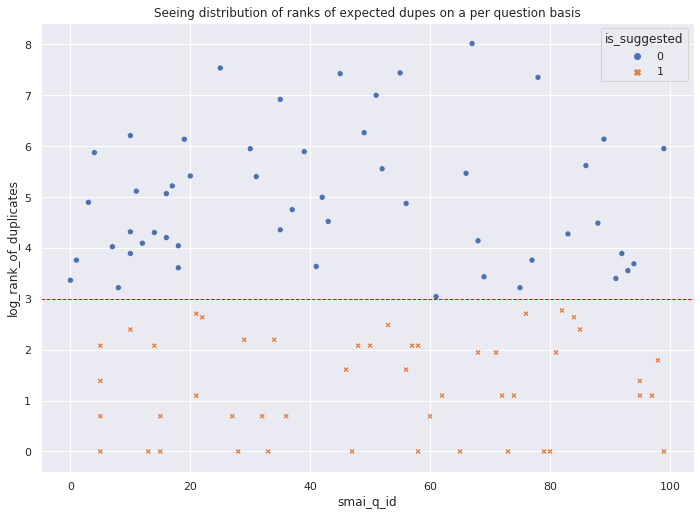

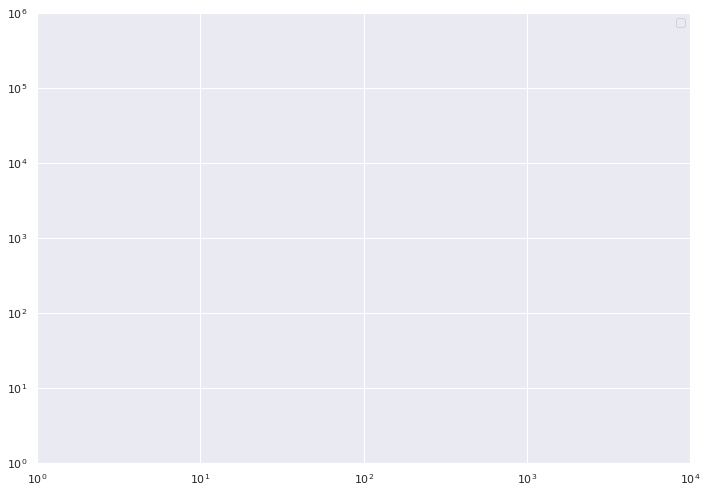

/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


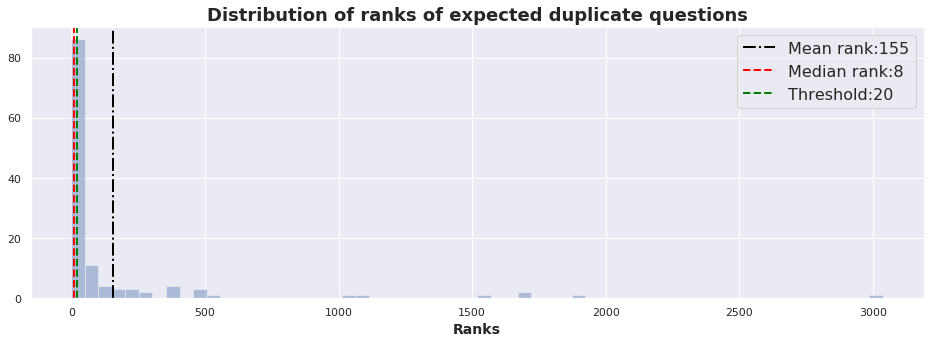

################################
Model id is  1
file opened with id  0
file opened with id  1
file opened with id  2
file opened with id  3


/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
No handles with labels found to put in legend.


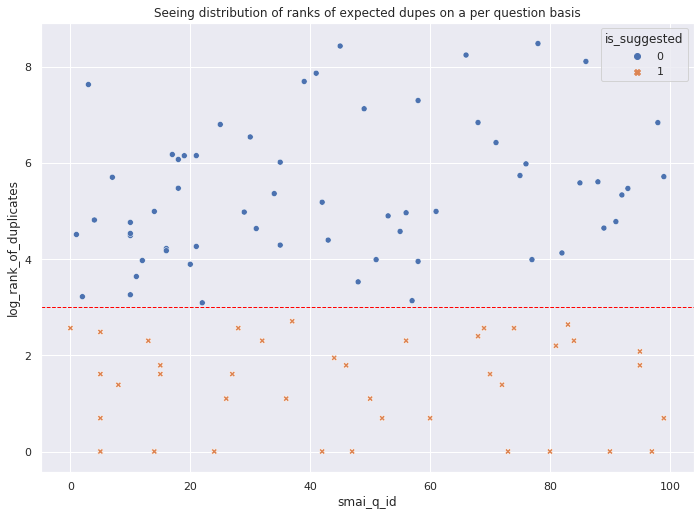

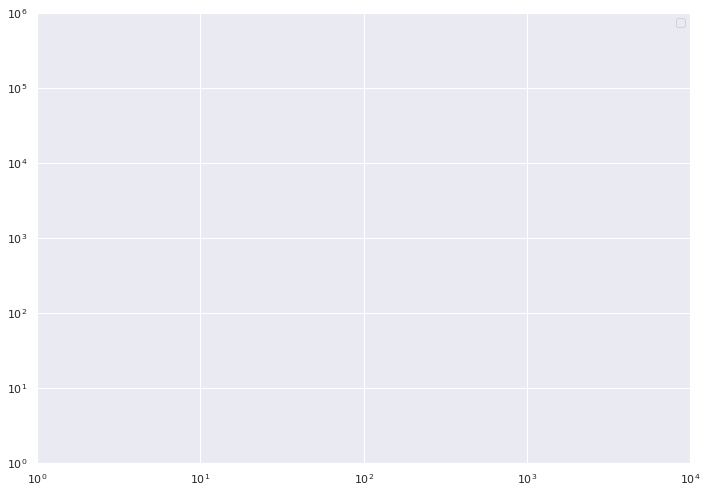

/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


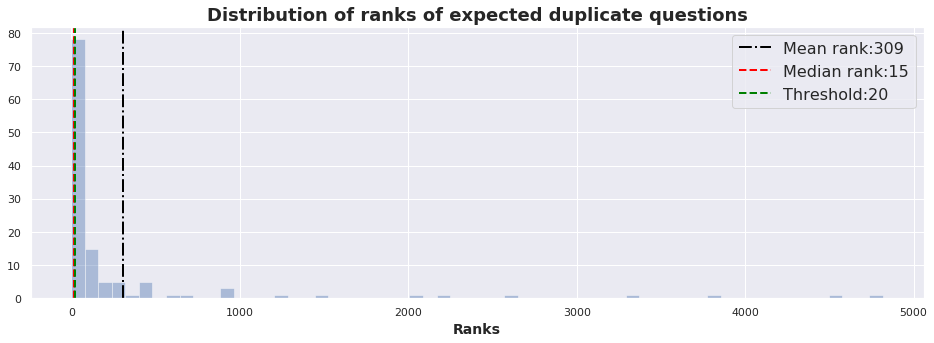

################################
Model id is  2
file opened with id  0
file opened with id  1
file opened with id  2
file opened with id  3


/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
No handles with labels found to put in legend.


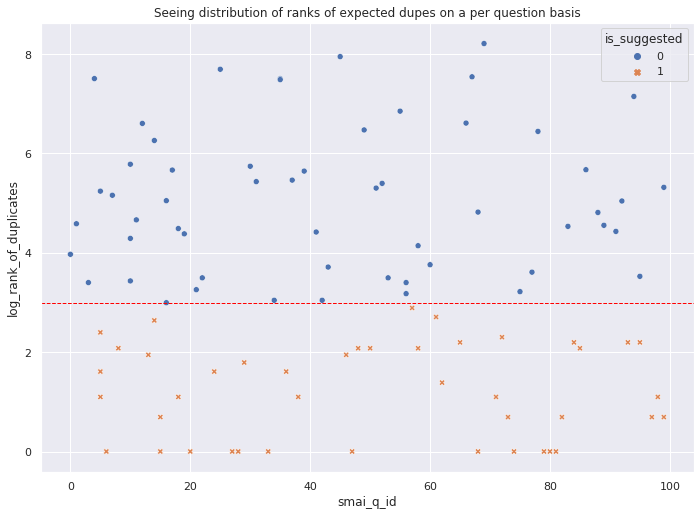

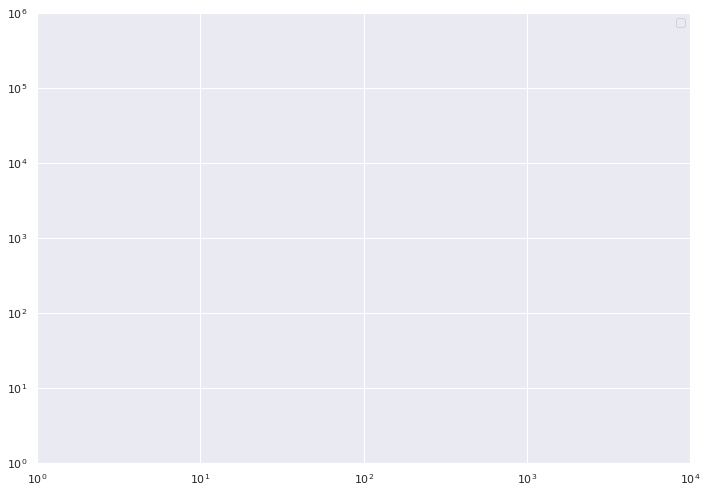

/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


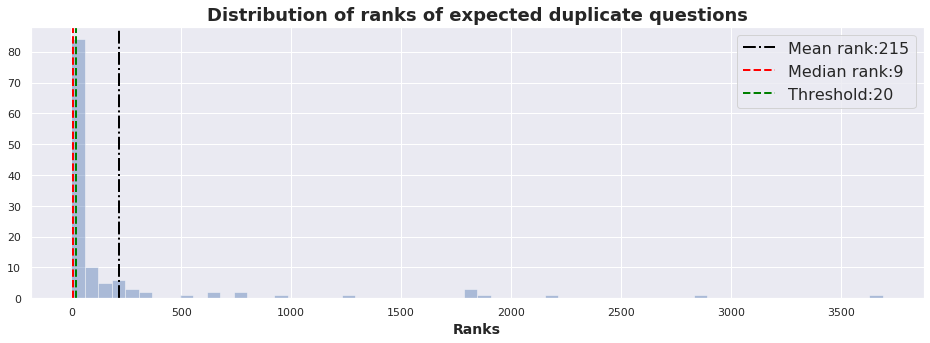

################################
Model id is  3
file opened with id  0
file opened with id  1
file opened with id  2
file opened with id  3


/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
No handles with labels found to put in legend.


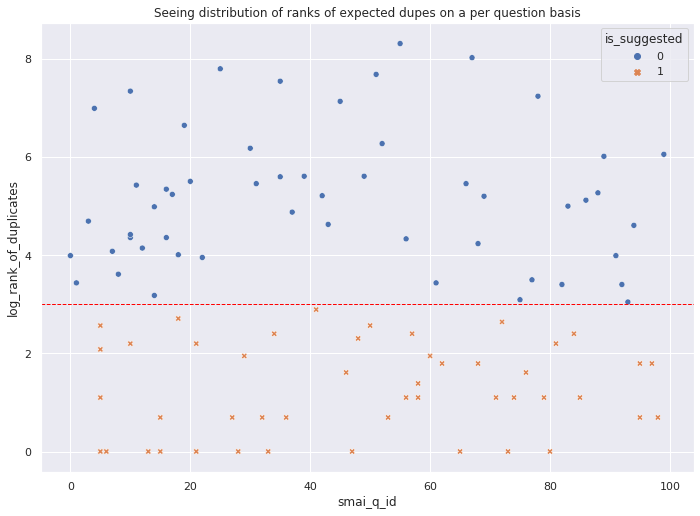

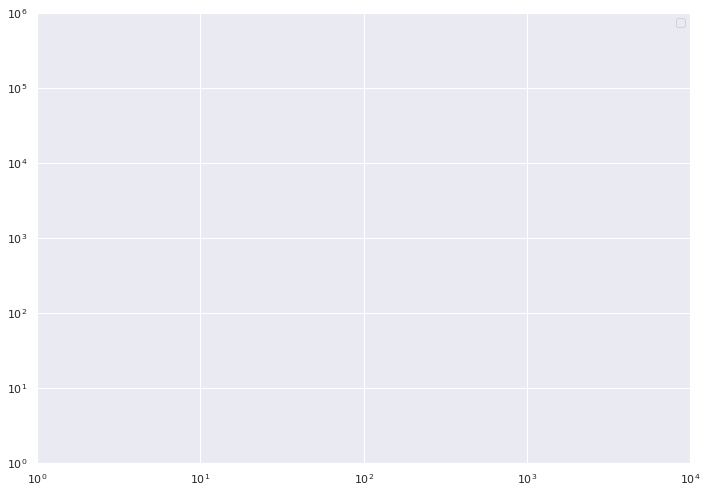

/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


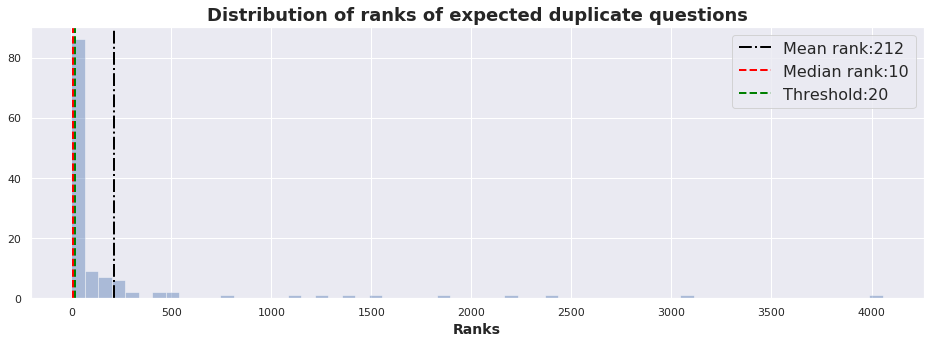

################################
Model id is  4
file opened with id  0
file opened with id  1
file opened with id  2
file opened with id  3


/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
No handles with labels found to put in legend.


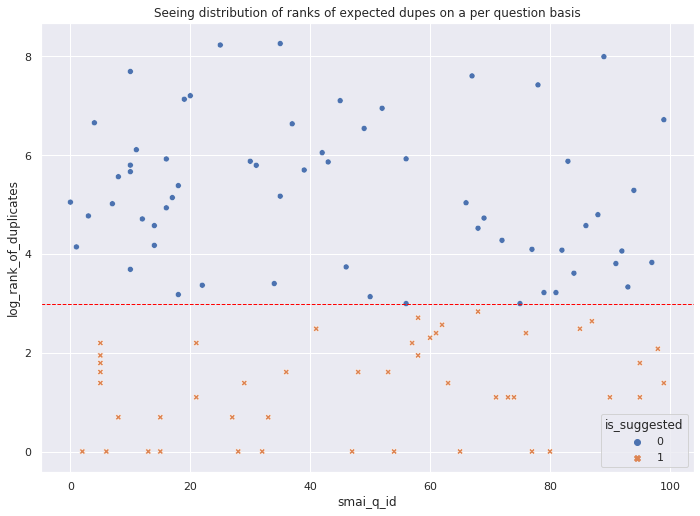

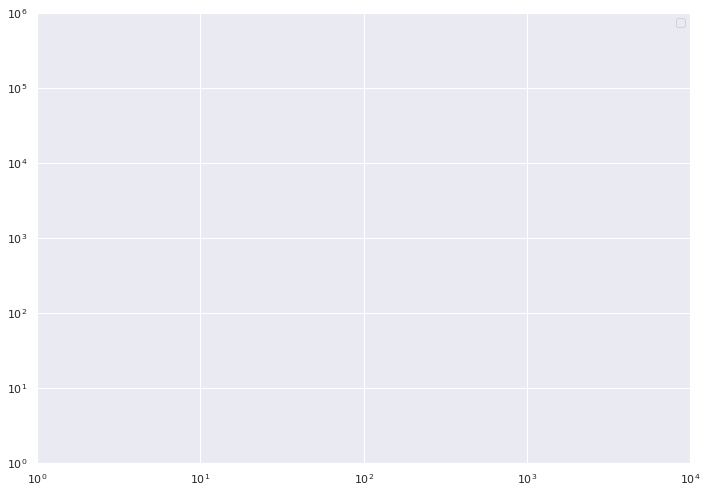

/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


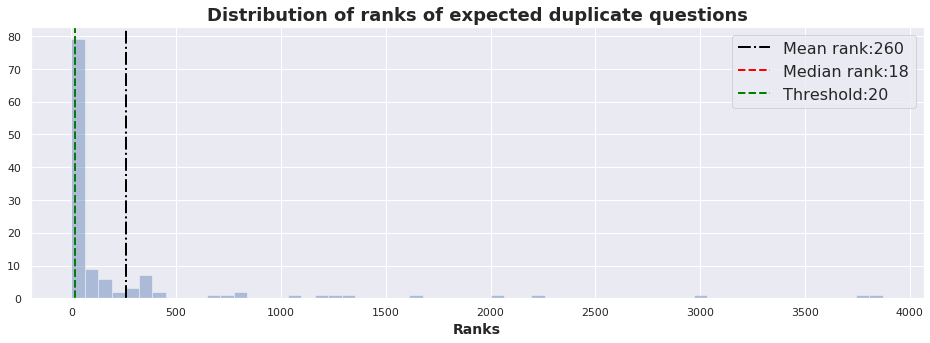

################################
Model id is  5
file opened with id  0
file opened with id  1
file opened with id  2
file opened with id  3


/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
No handles with labels found to put in legend.


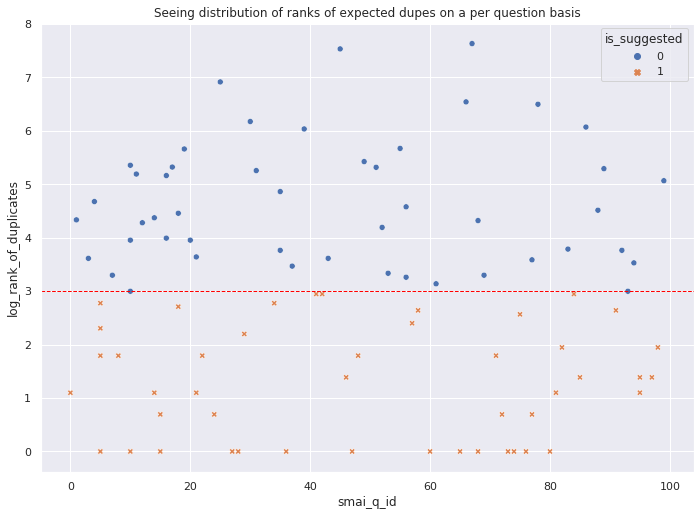

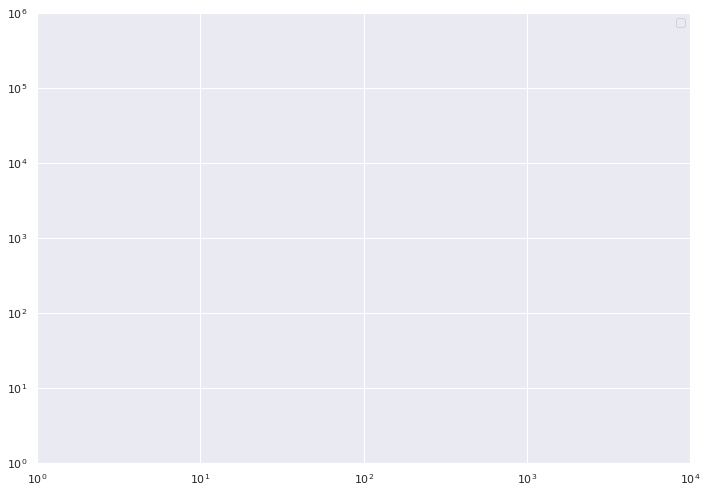

/home/anmolagarwal/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


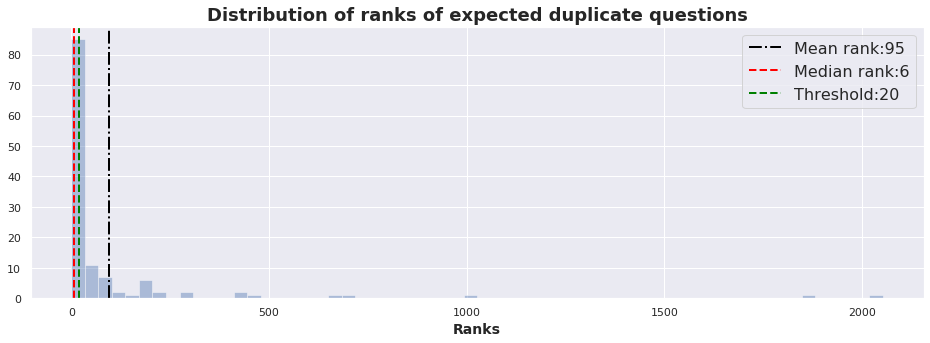

################################


In [11]:
for curr_model_idx in range(6):
    print("Model id is ", curr_model_idx)
    x_c, y_c=fetch_ranks_for_model(curr_model_idx)
    is_suggested=[1 if rank<THRESHOLD else 0 for rank in y_c ]
    dups_dict={"rank_of_duplicates":y_c, "smai_q_id":x_c, "is_suggested":is_suggested}
    q_df=pd.DataFrame(dups_dict)
    q_df=q_df[q_df['rank_of_duplicates']<5000]
    plotting_scatterplot(q_df)
    plt.show()
    plot_histogram(q_df)
    plt.show()
    print("################################")

    

In [12]:
#plt.show()
#sns.histplot(data=q_df, x="rank_of_duplicates",fill=False)

In [13]:
#sns.kdeplot(data=q_df, x="rank_of_duplicates")

In [14]:
#sorted(q_df['rank_of_duplicates'])

In [15]:
#sns.histplot(data=q_df, x="rank_of_duplicates",kde=True)
#plt.yscale('log', nonposy='clip')

In [16]:
#sns.distplot(x=q_df["rank_of_duplicates"])
#plt.axvline(x=20,linewidth=0.5, color='r')

In [17]:
#len(set(y_c))